<a href="https://colab.research.google.com/github/Vaishnavit08/Finger-Print-Detection-Using-Python/blob/main/03_fingrprint_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!pip3 install opencv-python

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d ruizgara/socofing

Dataset URL: https://www.kaggle.com/datasets/ruizgara/socofing
License(s): other
 98% 824M/838M [00:08<00:00, 149MB/s]
100% 838M/838M [00:08<00:00, 107MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/socofing.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


Best match : 491__M_Left_ring_finger.BMP
Score200.0


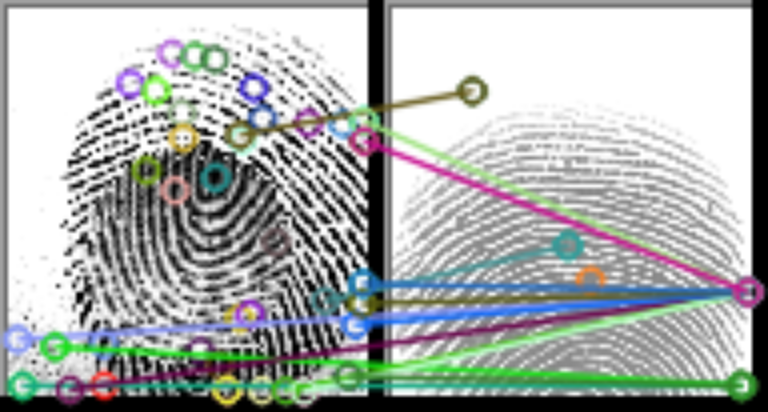

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow


sample = cv2.imread("/content/socofing/SOCOFing/Altered/Altered-Hard/100__M_Right_index_finger_CR.BMP")

best_score=0

filename= None
image= None
kp1,kp2,mp = None,None,None
counter=0

for file in [file for file in os.listdir("SOCOFing/Real")[:1000]]:
  # if counter%10==0:
  #   print(counter)
  # counter+=1
  fingerprint_image = cv2.imread("SOCOFing/Real/"+file)


  shift=cv2.SIFT_create()

  keypoints_1, descriptors_1 = shift.detectAndCompute(sample, None)
  keypoints_2, descriptors_2 = shift.detectAndCompute(fingerprint_image, None)

  matches = cv2.FlannBasedMatcher( {'algorithm':1,'trees':10},{}).knnMatch(descriptors_1,descriptors_2,k=2) #closest match
  match_points=[]

  for p,q in matches:
    if p.distance < 0.8*q.distance:
      match_points.append(p)

    keypoints=0
    if len(keypoints_1)<len(keypoints_2):
      keypoints=len(keypoints_1)
    else:
      keypoints=len(keypoints_2)

    if len(match_points)/keypoints*100>best_score:
      best_score=len(match_points)/keypoints*100
      filename=file
      image=fingerprint_image
      kp1=keypoints_1
      kp2=keypoints_2
      mp=match_points

print("Best match :",filename)
print("Score"+ str(best_score))

result = cv2.drawMatches(sample,kp1,image,kp2,mp,None)
result = cv2.resize(result,None,fx=4,fy=4)
cv2_imshow(result)



# New Section